In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# dataset from seaborn library

df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Data Preprocessing

In [3]:
# dictionary

df['sex'].replace({'Male':0, 'Female':1},inplace=True)
df['smoker'].replace({'No':0, 'Yes':1},inplace=True)
df['day'].replace({'Sat':0, 'Sun':1, 'Thur':2, 'Fri':3},inplace=True)
df['time'].replace({'Lunch':0,'Dinner':1},inplace=True)

In [4]:
# dividing dataset into independent and dependent variables

X=df.drop('tip',axis=1)
y=df['tip']

In [5]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\us

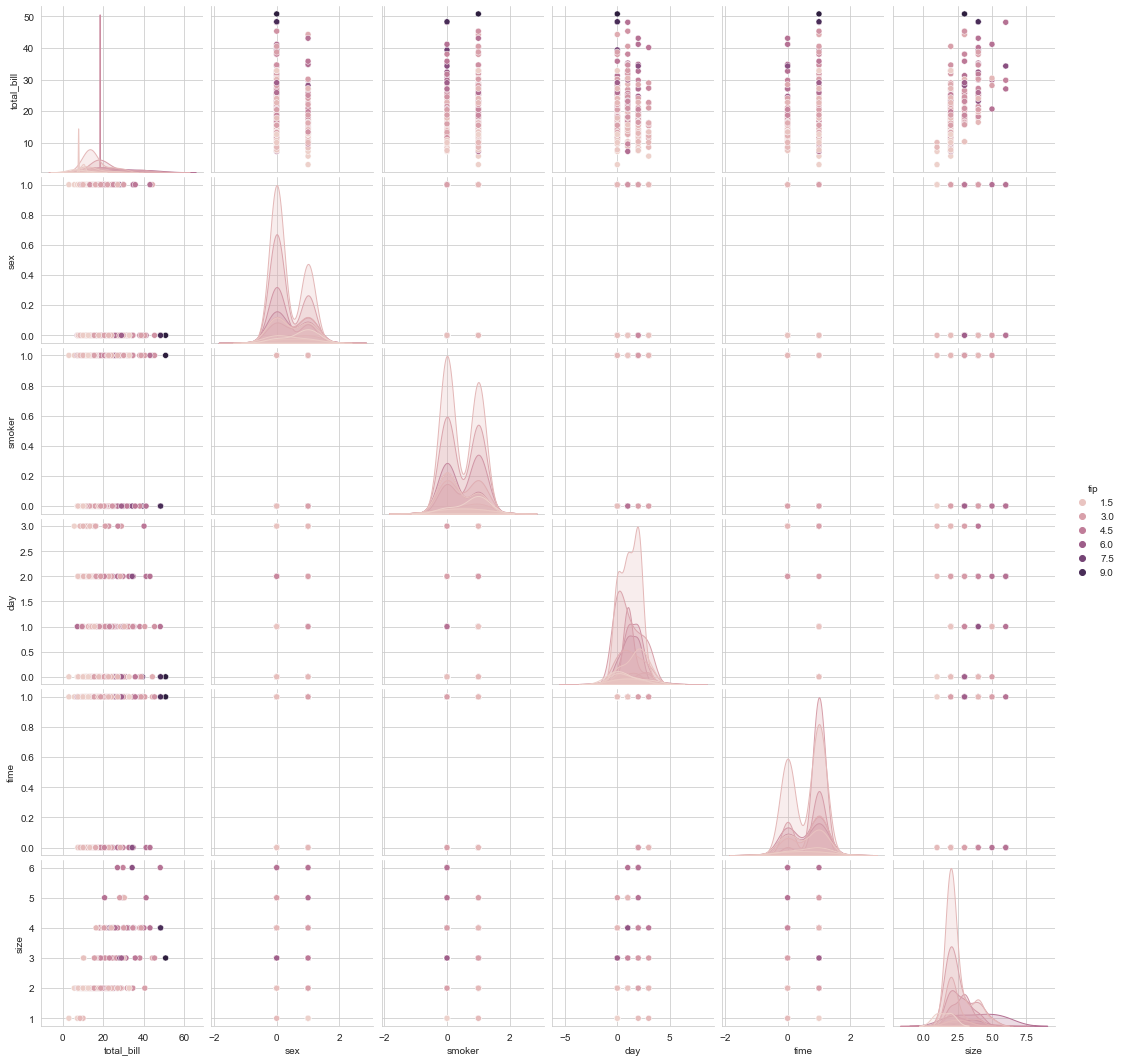

In [6]:
sns.pairplot(df,hue='tip')

# KNN Algorithm

In [7]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)


In [8]:
knn_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
knn_result.head(10)

,Actual Value,Predicted Value
64,2.64,2.820
63,3.76,3.200
55,3.51,3.255
111,1.00,1.250
225,2.50,2.500
92,1.00,1.250
76,3.08,3.420
181,5.65,4.825
188,3.50,3.500
180,3.68,4.640


<AxesSubplot:>

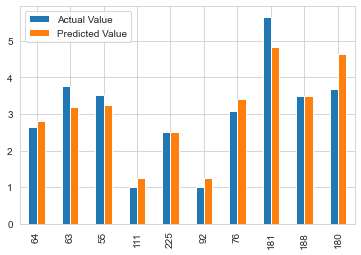

In [9]:
knn_graph = knn_result.head(10)
knn_graph.plot(kind='bar')

In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.33673469387755095
Mean Squared Error: 0.3154316326530611
Root Mean Squared Error: 0.5616330053095715


In [11]:
# Saving model

import pickle
pickle.dump(regressor, open('pickle.pkl','wb'))

In [12]:
# Loading model to compare the results

regressor = pickle.load(open('pickle.pkl','rb'))
print(regressor.predict([[10,0,1,0,0,1]]))

[1.805]
